<center><h1>Detecting Malaria cells_path_path_path_path using Convolutional Neural Network</h1></center>
![ml](https://www.h-its.org/wp-content/uploads/2018/07/Malaria_Press_image_1.png)    
    
   ### Steps to solve the problem :- 
   1. Importing Libraries.
   2. Loading the data.
   3. Data preprocessing.
   4. Data augmentation.
   5. Ploting images and its labels to understand how does an infected cell and uninfected cell looks like.
   6. Spliting data in Train , Evaluation and Test set.
   7. Creating a Convolution Neural Network function.
   8. Wrapping it with Tensorflow Estimator function.
   9. Training the data on Train data.
   10. Evaluating on evaluation data.
   11. Predicting on Test data
   12. Ploting the predicted image and its respective True value and predicted value.
   
   ### Note :
*   This is my second image classification task.
*    Please feel free to suggest me what should i have done more to improve the model to perform more better.
*    Please upvote this kernel if you liked my work , Thank you.

In [11]:
import os
print(os.getcwd())

c:\Users\bryan\OneDrive - Université Libre de Bruxelles\Master 1 Ingénieur Civile\PROJ-H419 - Biomedical engineering project in image analysis - 202526\PROJ-H419


In [2]:
from __future__ import absolute_import, division, print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import albumentations as A
import os
from PIL import Image
print(os.listdir("input/cell_images"))

['cell_images', 'Parasitized', 'Uninfected']


In [11]:
infected = os.listdir('input/cell_images/Parasitized/') 
uninfected = os.listdir('input/cell_images/Uninfected/')

In [17]:
data_path = []
labels = []

for i in infected:
    try:
        data_path.append("input/cell_images/Parasitized/"+i)
        labels.append(1) 
    except AttributeError:
        raise ValueError('Error processing infected image path')
    
for u in uninfected:
    try:
        data_path.append("input/cell_images/Uninfected/"+u)
        labels.append(0)
    except AttributeError:
        raise ValueError('Error processing uninfected image path')

In [21]:
from PIL import Image
import os
import numpy as np

sizes_w = []
sizes_h = []

print("Starting to analyze image sizes...")

for path in data_path:
    try:
        # Open the image file
        with Image.open(path) as img:
            width, height = img.size
            sizes_w.append(width)
            sizes_h.append(height)

    except Exception as e:
        print(f"Error image {path}: {e}")

print(f"Min width : {min(sizes_w)}")
print(f"Min height : {min(sizes_h)}")
print(f"Max width : {max(sizes_w)}")
print(f"Max height : {max(sizes_h)}")

avg_width = np.mean(sizes_w)
avg_height = np.mean(sizes_h)
print(f"Average size : {int(avg_width)} x {int(avg_height)}")

Starting to analyze image sizes...
Error image input/cell_images/Parasitized/Thumbs.db: cannot identify image file 'input/cell_images/Parasitized/Thumbs.db'
Error image input/cell_images/Uninfected/Thumbs.db: cannot identify image file 'input/cell_images/Uninfected/Thumbs.db'
Min width : 46
Min height : 40
Max width : 394
Max height : 385
Average size : 132 x 132


In [33]:
cells_path = np.array(data_path)
labels = np.array(labels)

# np.save('Cells' , cells_path)
# np.save('Labels' , labels)

In [6]:
print('Cells : {} | labels : {}'.format(cells_path.shape , labels.shape))

Cells : (27560,) | labels : (27560,)


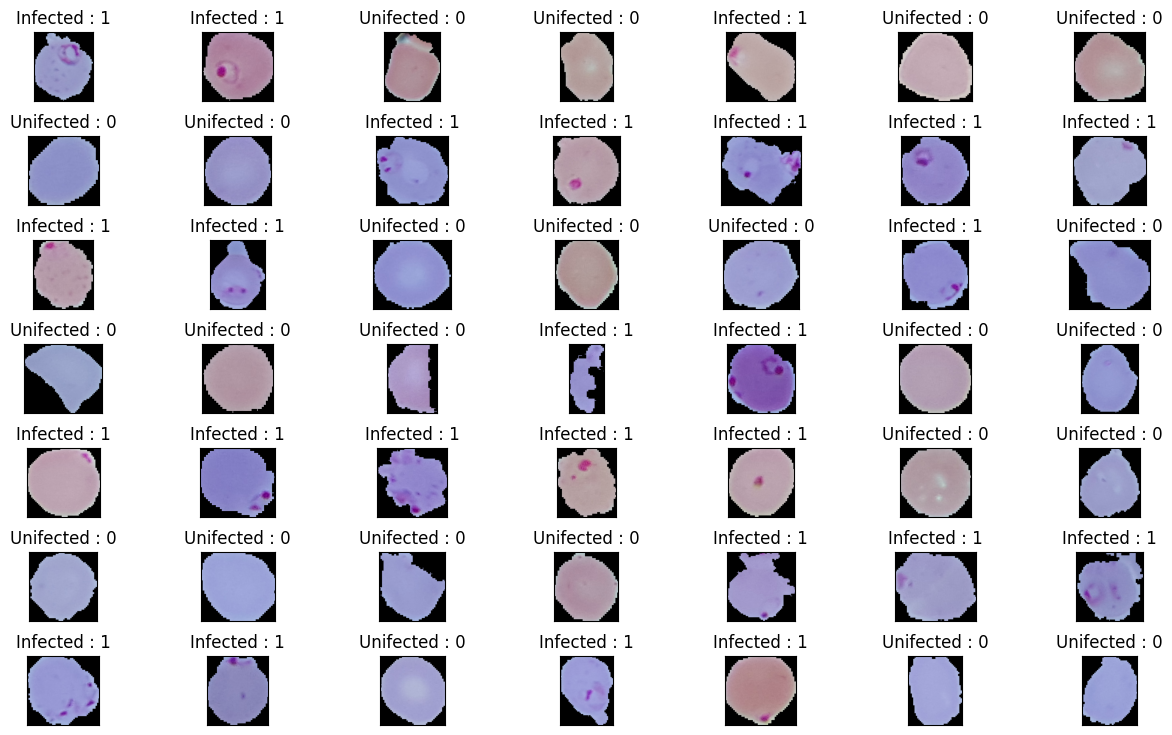

In [23]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells_path.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    img =cv2.imread(cells_path[r[0]])
    plt.imshow(img)
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

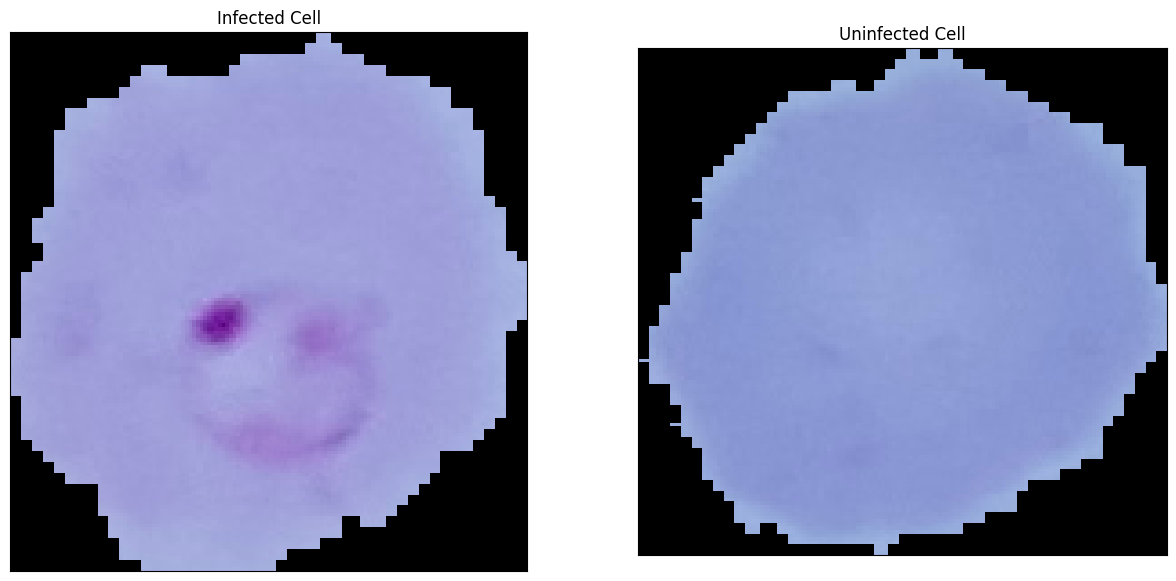

In [26]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(cells_path[0]))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(cells_path[16000]))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [35]:
# Data augmentation
initial_Augmentation = A.Compose([
    A.Resize(50, 50),
    A.SomeOf([
    A.Rotate(limit=75, p=0.5),
    A.Blur(blur_limit=5, p=0.5),
],n=1,p=1.0)
])
    
improved_Augmentation = A.Compose([
    A.Resize(128, 128),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=180, p=0.7),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=15, val_shift_limit=10, p=0.3), 
    A.GaussianBlur(blur_limit=(3, 5), p=0.2),
    
    A.Normalize(mean=(0,0,0), std=(1,1,1), max_pixel_value=255.0),
])
    

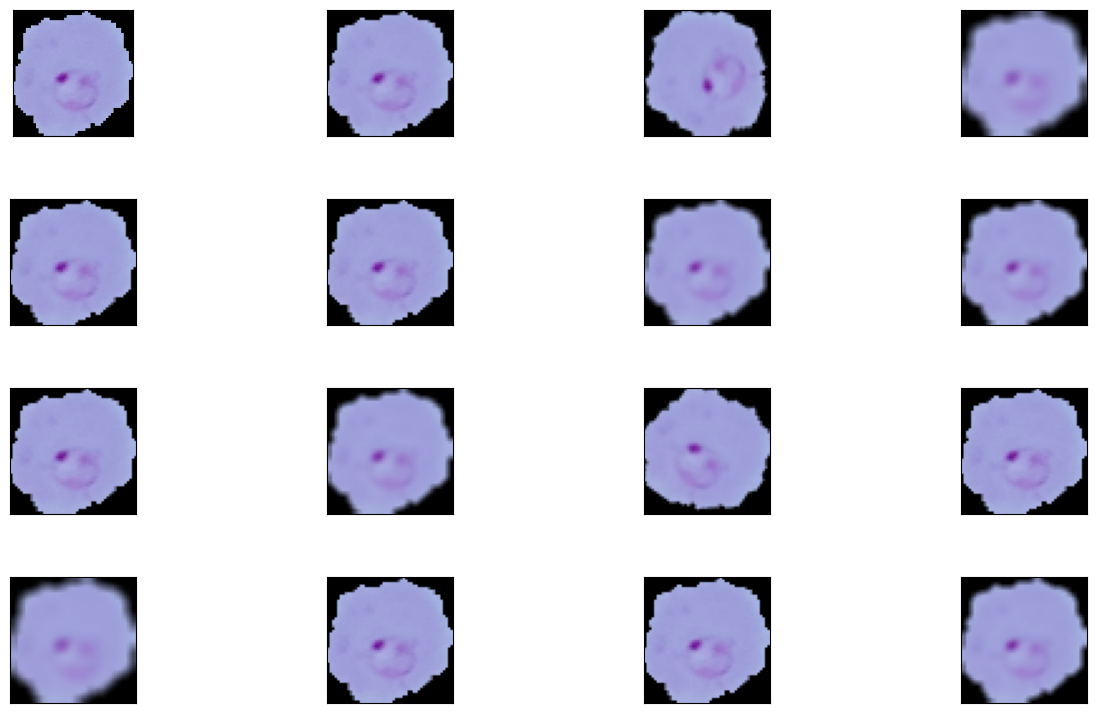

In [36]:
im1 = cv2.imread(cells_path[0])
images_list = [im1]
im1 = np.array(im1)

for i in range(15):
    augmentations = initial_Augmentation(image=im1)
    augmented_image = augmentations['image']
    images_list.append(augmented_image)

plt.figure(1 , figsize = (15 , 9))
n = 0
for i in range(16):
    n += 1 
    plt.subplot(4 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(images_list[i])
    plt.xticks([]) , plt.yticks([])
plt.show()

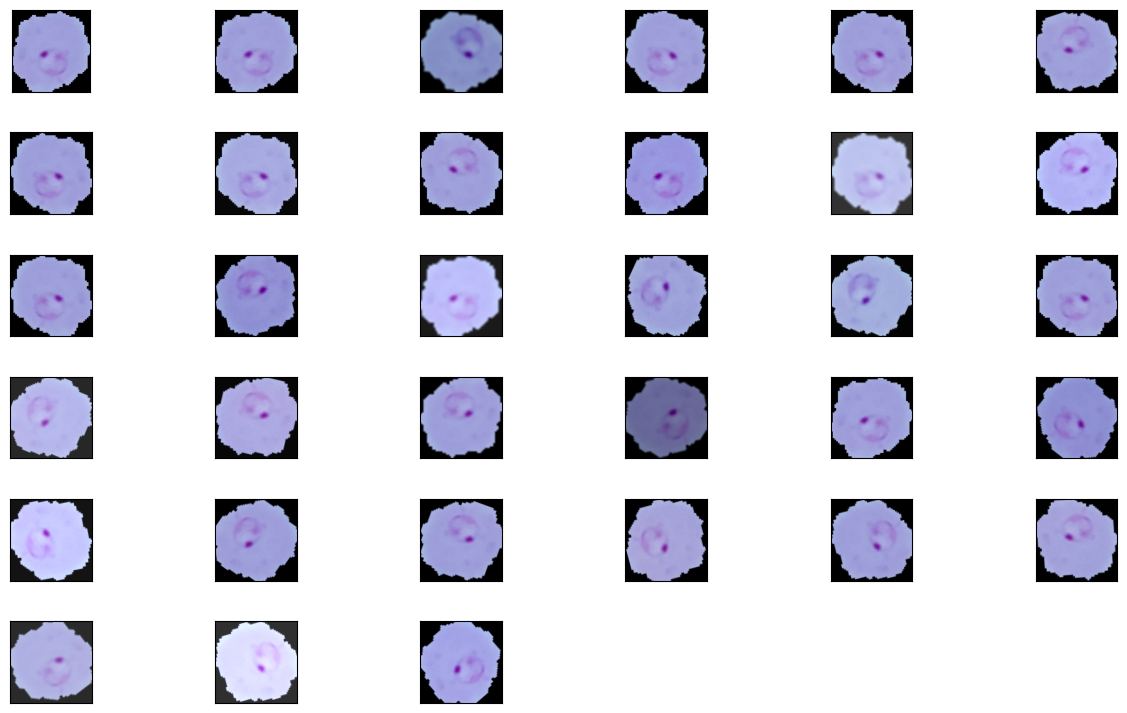

In [40]:
im1 = cv2.imread(cells_path[0])
images_list = [im1]
im1 = np.array(im1)

for i in range(32):
    augmentations = improved_Augmentation(image=im1)
    augmented_image = augmentations['image']
    images_list.append(augmented_image)

plt.figure(1 , figsize = (15 , 9))
n = 0
for i in range(33):
    n += 1 
    plt.subplot(6 , 6 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(images_list[i])
    plt.xticks([]) , plt.yticks([])
plt.show()

In [34]:
n = np.arange(cells_path.shape[0])
np.random.shuffle(n)
cells = cells_path[n]
labels = labels[n]

In [44]:
from sklearn.model_selection import train_test_split

train_x , test_x , train_y , test_y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

train_x , eval_x , train_y , eval_y = train_test_split(train_x , train_y , 
                                                    test_size = 0.2 , 
                                                    random_state = 111)

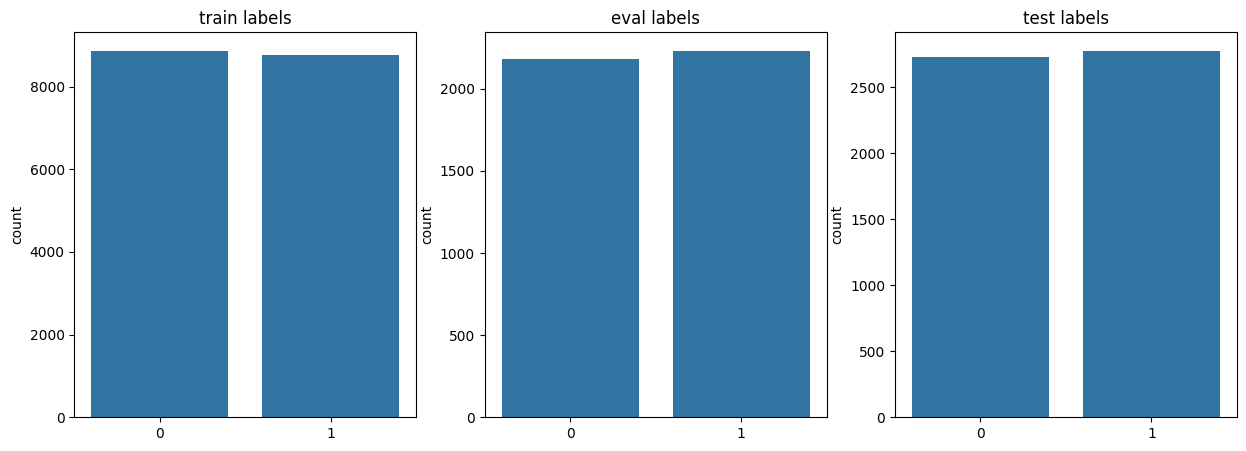

In [45]:
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y , eval_y , test_y] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [46]:
print('train data shape {} ,eval data shape {} , test data shape {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))

train data shape (17638,) ,eval data shape (4410,) , test data shape (5512,)


In [ ]:
tf.reset_default_graph()
def cnn_model_fn(features , labels , mode):
    input_layers = tf.reshape(features['x'] , [-1 , 50 , 50 ,3])    
    conv1 = tf.layers.conv2d(
        inputs = input_layers , 
        filters = 50 , 
        kernel_size = [7 , 7],
        padding = 'same',
        activation = tf.nn.relu
        ) 
    
    
    conv2 = tf.layers.conv2d(
        inputs = conv1, 
        filters = 90,
        kernel_size = [3 , 3],
        padding = 'valid',
        activation = tf.nn.relu
        )

        
    conv3 = tf.layers.conv2d(
        inputs = conv2 ,
        filters = 10,
        kernel_size = [5 , 5],
        padding = 'same', 
        activation = tf.nn.relu
        )
    
    pool1 = tf.layers.max_pooling2d(inputs = conv3 , pool_size = [2 , 2] ,
                                    strides = 2 )
    conv4 = tf.layers.conv2d(
        inputs = pool1 ,
        filters = 5,
        kernel_size = [3 , 3],
        padding = 'same', 
        activation = tf.nn.relu
        )

    pool2 = tf.layers.max_pooling2d(inputs = conv4 , pool_size = [2 , 2] ,
                                    strides = 2 , padding = 'same')
    
    pool2_flatten = tf.layers.flatten(pool2)
    fc1 = tf.layers.dense(
        inputs = pool2_flatten,
        units = 2000,
        activation = tf.nn.relu
        )
    fc2 = tf.layers.dense(
        inputs = fc1,
        units = 1000,
        activation = tf.nn.relu
        )
    fc3 = tf.layers.dense(
        inputs = fc2 , 
        units = 500 ,
        activation = tf.nn.relu
        )
    logits = tf.layers.dense(
        inputs = fc3 ,
        units = 2
        )
    
    predictions = {
        'classes': tf.argmax(input = logits , axis = 1),
        'probabilities': tf.nn.softmax(logits , name = 'softmax_tensor')
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode , 
                                          predictions = predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels , 
                                                 logits = logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
        train_op = optimizer.minimize(loss = loss , 
                                      global_step = tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode = mode , 
                                            loss = loss , 
                                            train_op = train_op 
                                           )
    eval_metric_op = {'accuracy' : tf.metrics.accuracy(labels = labels ,
                                         predictions =  predictions['classes'])}
    
    return tf.estimator.EstimatorSpec(mode = mode , 
                                      loss = loss , 
                                      eval_metric_ops = eval_metric_op)    

In [ ]:
malaria_detector = tf.estimator.Estimator(model_fn = cnn_model_fn , 
                                         model_dir = '/tmp/modelchkpt')

In [ ]:
tensors_to_log = {'probabilities':'softmax_tensor'}
logging_hook = tf.train.LoggingTensorHook(
    tensors = tensors_to_log , every_n_iter = 50 
    )

In [ ]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},
    y = train_y,
    batch_size = 100 , 
    num_epochs = None , 
    shuffle = True
    )
malaria_detector.train(input_fn = train_input_fn , steps = 1 , hooks = [logging_hook])

In [ ]:
malaria_detector.train(input_fn = train_input_fn , steps = 10000)

In [ ]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': eval_x},
    y = eval_y , 
    num_epochs = 1 , 
    shuffle = False
    )
eval_results = malaria_detector.evaluate(input_fn = eval_input_fn)
print(eval_results)

In [ ]:
pred_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x' : test_x},
    y = test_y,
    num_epochs = 1,
    shuffle = False
    )

y_pred = malaria_detector.predict(input_fn = pred_input_fn)
classes = [p['classes'] for p in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(test_y , classes) , 
                           classification_report(test_y , classes) , 
                           accuracy_score(test_y , classes)))

In [ ]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_x[r[0]])
    plt.title('true {} : pred {}'.format(test_y[r[0]] , classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()